<a href="https://colab.research.google.com/github/CY3R3N/OMR-Sheet-Scanner-With-OpenCV-Python/blob/main/OMR_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! apt-get install git
!git clone https://github.com/CY3R3N/OMR-Sheet-Scanner-With-OpenCV-Python.git

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Cloning into 'OMR-Sheet-Scanner-With-OpenCV-Python'...
fatal: could not read Username for 'https://github.com': No such device or address


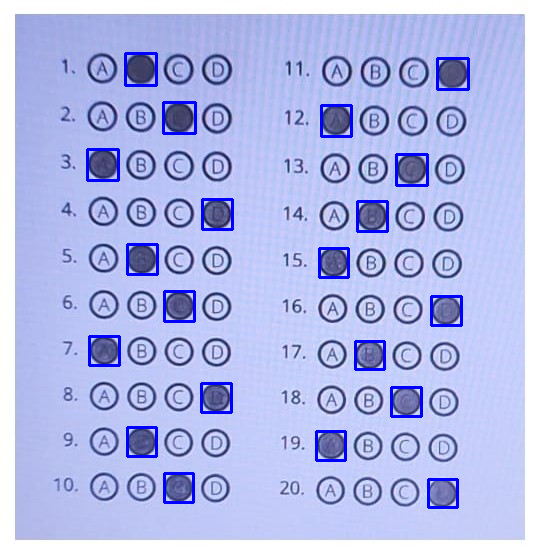

False

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import for Colab

# Load the image
image = cv2.imread('/content/1fa4542c-6693-4e12-8295-43b5dae54050.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply binary thresholding
_, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours of bubbles
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from top to bottom, left to right for proper bubble order
contours = sorted(contours, key=lambda c: (cv2.boundingRect(c)[1], cv2.boundingRect(c)[0]))

# Define bubble size range to filter out unwanted small/large contours
bubble_contours = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)

    # Filter contours by size and aspect ratio (for circular bubbles)
    if 20 < w < 40 and 20 < h < 40 and 0.9 < aspect_ratio < 1.1:
        bubble_contours.append(contour)

# Loop through the filtered bubbles and mark the filled ones
filled_bubbles = []
for i, contour in enumerate(bubble_contours):
    (x, y, w, h) = cv2.boundingRect(contour)

    # Extract ROI for each bubble
    roi = thresh[y:y + h, x:x + w]

    # Calculate filled percentage (dark pixels)
    filled_percentage = np.count_nonzero(roi) / (w * h)

    # Mark bubble as filled if the percentage exceeds a threshold (adjust as necessary)
    if filled_percentage > 0.5:
        filled_bubbles.append((x, y))
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with detected bubbles
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optionally, save the output image with marked bubbles
cv2.imwrite('/mnt/data/omr_detected.png', image)


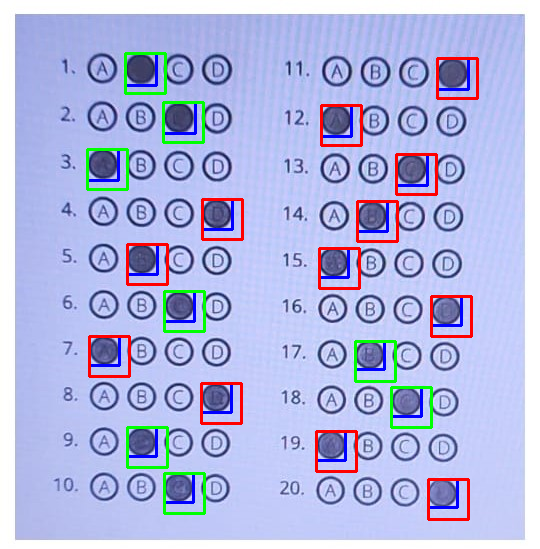

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import for Colab

#[1.11,2,12]

# Predefined demo answer key for 20 questions
answer_key = ['B', 'C', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B',
              'C', 'A', 'D', 'B', 'A', 'C', 'B', 'D', 'C', 'A']

# Load the image
image = cv2.imread('/content/1fa4542c-6693-4e12-8295-43b5dae54050.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply binary thresholding
_, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours of bubbles
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from top to bottom, left to right for proper bubble order
contours = sorted(contours, key=lambda c: (cv2.boundingRect(c)[1], cv2.boundingRect(c)[0]))

# Define bubble size range to filter out unwanted small/large contours
bubble_contours = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)

    # Filter contours by size and aspect ratio (for circular bubbles)
    if 20 < w < 40 and 20 < h < 40 and 0.9 < aspect_ratio < 1.1:
        bubble_contours.append(contour)

# List to hold detected answers
detected_answers = [None] * 20

# Loop through the filtered bubbles and mark the filled ones
filled_bubbles = []
for i, contour in enumerate(bubble_contours):
    (x, y, w, h) = cv2.boundingRect(contour)

    # Extract ROI for each bubble
    roi = thresh[y:y + h, x:x + w]

    # Calculate filled percentage (dark pixels)
    filled_percentage = np.count_nonzero(roi) / (w * h)

    # Mark bubble as filled if the percentage exceeds a threshold (adjust as necessary)
    if filled_percentage > 0.5:
        filled_bubbles.append((x, y, i))  # Store the index of the bubble
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Mark detected filled bubble in green

# Map filled bubbles to answers
for idx, (x, y, bubble_index) in enumerate(filled_bubbles):
    question_index = bubble_index // 4  # Assuming 4 options per question
    option_index = bubble_index % 4  # 0 for A, 1 for B, etc.

    # Compare with answer key
    if answer_key[question_index] == ['A', 'B', 'C', 'D'][option_index]:
        cv2.rectangle(image, (x, y), (x + 40, y + 40), (0, 255, 0), 2)  # Green for correct
    else:
        cv2.rectangle(image, (x, y), (x + 40, y + 40), (0, 0, 255), 2)  # Red for incorrect

# Display the image with detected bubbles and markings
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the output image with marked bubbles
#cv2.imwrite('/mnt/data/omr_detected_with_answers.png', image)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import for Colab

# Predefined demo answer key for 20 questions
answer_key = ['B', 'D', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B',
              'C', 'A', 'D', 'B', 'A', 'C', 'B', 'D', 'C', 'A']

# Load the image
image = cv2.imread('/content/omr_sheet.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply binary thresholding
_, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours of bubbles
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from top to bottom, left to right for proper bubble order
contours = sorted(contours, key=lambda c: (cv2.boundingRect(c)[1], cv2.boundingRect(c)[0]))

# Define bubble size range to filter out unwanted small/large contours
bubble_contours = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)

    # Filter contours by size and aspect ratio (for circular bubbles)
    if 20 < w < 40 and 20 < h < 40 and 0.9 < aspect_ratio < 1.1:
        bubble_contours.append(contour)

# List to hold detected answers
detected_answers = [None] * 20

# Loop through the filtered bubbles and mark the filled ones
filled_bubbles = []
for i, contour in enumerate(bubble_contours):
    (x, y, w, h) = cv2.boundingRect(contour)

    # Extract ROI for each bubble
    roi = thresh[y:y + h, x:x + w]

    # Calculate filled percentage (dark pixels)
    filled_percentage = np.count_nonzero(roi) / (w * h)

    # Mark bubble as filled if the percentage exceeds a threshold (adjust as necessary)
    if filled_percentage > 0.5:
        filled_bubbles.append((x, y, i))  # Store the index of the bubble
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Mark detected filled bubble in green

# Map filled bubbles to answers
for idx, (x, y, bubble_index) in enumerate(filled_bubbles):
    question_index = bubble_index // 4  # Assuming 4 options per question
    option_index = bubble_index % 4  # 0 for A, 1 for B, etc.

    # Compare with answer key
    if answer_key[question_index] == ['A', 'B', 'C', 'D'][option_index]:
        cv2.rectangle(image, (x, y), (x + 40, y + 40), (0, 255, 255), 2)  # Yellow for correct
    else:
        cv2.rectangle(image, (x, y), (x + 40, y + 40), (0, 0, 255), 2)  # Red for incorrect

# Display the image with detected bubbles and markings
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the output image with marked bubbles
#cv2.imwrite('/mnt/data/omr_detected_with_answers.png', image)
